### UCI Pima Diabetes Dataset

* UCI ML Repositiory [Pima+Indians+Diabetes](http://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes)




**Attributes** :
   1. Number of times pregnant
   
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   
   3. Diastolic blood pressure (mm Hg)
   
   4. Triceps skin fold thickness (mm)
   
   5. 2-Hour serum insulin (mu U/ml)
   
   6. Body mass index (weight in kg/(height in m)^2)
   
   7. Diabetes pedigree function
   
   8. Age (years)
   
   9. Class variable (0 or 1)

## Import Libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
from tensorflow.keras.models import Sequential

In [6]:
from tensorflow.keras.layers import Dense

In [7]:
from sklearn.metrics import confusion_matrix ,accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve

## Load Dataset

In [8]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
data.shape

(768, 9)

In [10]:
data.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
712,10,129,62,36,0,41.2,0.441,38,1
483,0,84,82,31,125,38.2,0.233,23,0
492,4,99,68,38,0,32.8,0.145,33,0
741,3,102,44,20,94,30.8,0.400,26,0
463,5,88,78,30,0,27.6,0.258,37,0


In [11]:
X = data.drop(['Outcome'] ,axis=1)
y = data['Outcome']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X ,y ,test_size=0.25 ,random_state=11111)

In [13]:
sc = StandardScaler()

In [14]:
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [15]:
model = Sequential()
model.add(Dense(12 ,activation='relu',input_shape= X_train.shape[1:]))
model.add(Dense(12 ,activation='relu'))
model.add(Dense(1 ,activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 277
Trainable params: 277
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(
               optimizer = 'adam'                ,
               loss      = 'binary_crossentropy' ,
               metrics   =  ["accuracy"]
             )

In [18]:
model_history = model.fit(
                            X_train ,y_train ,
                            validation_data = (X_test,y_test) ,
                            epochs = 20
                         )

Epoch 1/20
18/18 [==============================] - 1s 24ms/step - loss: 0.6886 - accuracy: 0.5781 - val_loss: 0.6895 - val_accuracy: 0.5677
Epoch 2/20
18/18 [==============================] - 0s 6ms/step - loss: 0.6549 - accuracy: 0.6493 - val_loss: 0.6610 - val_accuracy: 0.6510
Epoch 3/20
18/18 [==============================] - 0s 6ms/step - loss: 0.6278 - accuracy: 0.6927 - val_loss: 0.6392 - val_accuracy: 0.6979
Epoch 4/20
18/18 [==============================] - 0s 5ms/step - loss: 0.6058 - accuracy: 0.7083 - val_loss: 0.6187 - val_accuracy: 0.7135
Epoch 5/20
18/18 [==============================] - 0s 5ms/step - loss: 0.5848 - accuracy: 0.7153 - val_loss: 0.6018 - val_accuracy: 0.7031
Epoch 6/20
18/18 [==============================] - 0s 5ms/step - loss: 0.5666 - accuracy: 0.7240 - val_loss: 0.5856 - val_accuracy: 0.7083
Epoch 7/20
18/18 [==============================] - 0s 5ms/step - loss: 0.5491 - accuracy: 0.7361 - val_loss: 0.5710 - val_accuracy: 0.7240
Epoch 8/20
18/18 [=

In [19]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)

In [20]:
acc = accuracy_score(y_test,y_pred)
print("Accuracy : {:.2f}%".format(acc*100) )

Accuracy : 78.65%


In [21]:
y_prob = model.predict(X_test)

In [22]:
auc = roc_auc_score(y_test,y_prob)
auc

0.8196064569341346

In [23]:
def plot_roc(y_test ,y_prob ,model):
    
    fpr, tpr, thr = roc_curve(y_test, y_prob)
    
    plt.plot(fpr ,tpr ,'k-')
    plt.plot([0, 1], [0, 1], 'k--', linewidth=0.5)
    
    plt.grid(True)
    
    plt.title("ROC Curve : " + model)

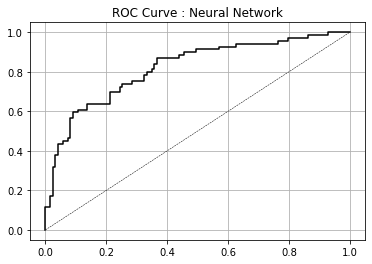

In [24]:
plot_roc(y_test, y_prob, 'Neural Network')

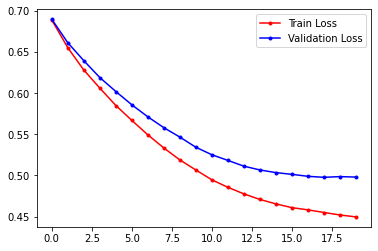

In [25]:
training_loss   = model_history.history['loss']
validation_loss = model_history.history['val_loss']


plt.plot(training_loss ,color='red' ,marker='.' ,label='Train Loss')
plt.plot(validation_loss ,color='blue' ,marker='.' ,label='Validation Loss')

plt.legend()